In [ ]:
#The goal of this project is to check if there is a difference on salaries depending on gender and ages
#Checking the impact of ages , gender and salary  on buying an amazon product

LOADING DATA

In [85]:

import pandas as pd
data = pd.read_csv('Social_Network_Ads.csv')

In [86]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


PREPROCESSING

In [87]:
#checking if there is nan values
data.isnull().sum()


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [88]:
data = data.drop('User ID', 1)

In [89]:
data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


DATA VISUALISATION

<AxesSubplot:title={'center':'histogram of different ages'}, xlabel='Age', ylabel='Frequency'>

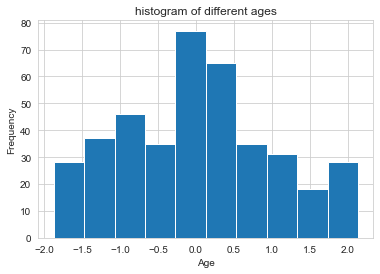

In [90]:
#Now we interpret our ages in histogram 
import matplotlib.pyplot as plt
import seaborn as sns
plt.title('histogram of different ages')
plt.xlabel("Age")

df['Age'].plot.hist()

<AxesSubplot:>

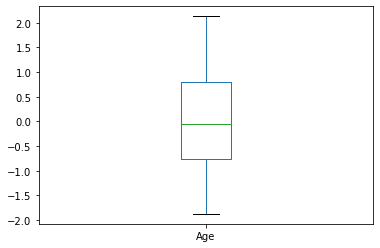

In [30]:
#using  boxplot to see the minimum and maximum of our data
data["Age"].plot.box()

<AxesSubplot:title={'center':'histogram of Estimated Salaries'}, xlabel='EstimatedSalary', ylabel='Frequency'>

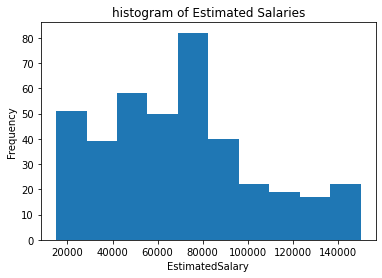

In [31]:
plt.title('histogram of Estimated Salaries')
plt.xlabel("EstimatedSalary")
data['EstimatedSalary'].plot.hist()

<AxesSubplot:>

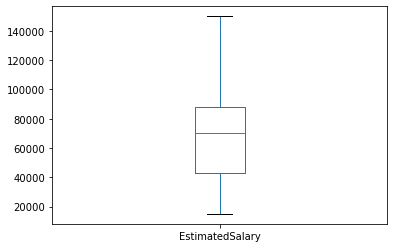

In [32]:
#using  boxplot to see the minimum and maximum of our data
data["EstimatedSalary"].plot.box()

<AxesSubplot:>

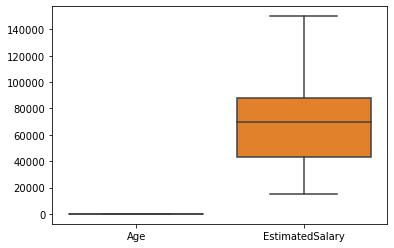

In [42]:
#Group box plot
dff=data.drop(["User ID","Gender","Purchased"],axis=1,inplace=False)
sns.boxplot(data=dff)

In [ ]:
#As we can see , age appears less important than salary ,it's just a simple scaling problem
#to avoid this problem , we will use Standardization


Standardization 

<AxesSubplot:>

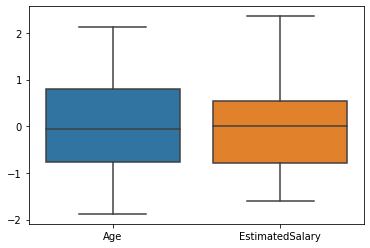

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dff["Age"]=scaler.fit_transform(dff[["Age"]].values)
dff["EstimatedSalary"]=scaler.fit_transform(dff[["EstimatedSalary"]].values)
sns.boxplot(data=dff)

C:\Users\ASUS RAZEN 5\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS RAZEN 5\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


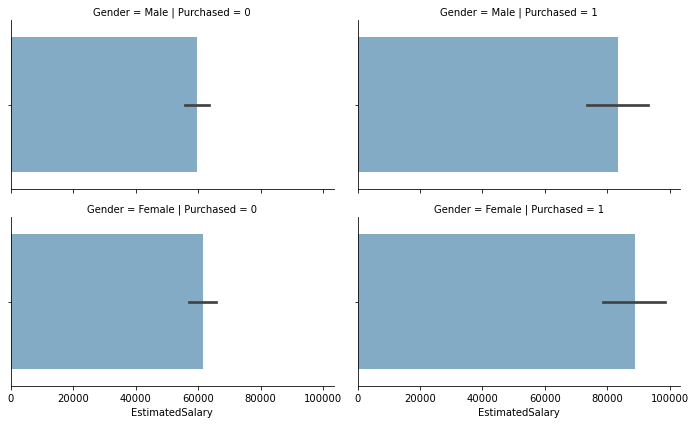

In [52]:
grid = sns.FacetGrid(data, row="Gender", col="Purchased", size=3, aspect=1.6)
grid.map(sns.barplot,'EstimatedSalary', alpha=.6)
grid.add_legend()

In [54]:
#we cant to see the impact of the gender on the Purchases
cleanup={"Purchased":{"yes":1, "no": 0}}  # at first, let's convert Purchased to numerical format
data.replace(cleanup, inplace=True)
data[["Gender", "Purchased"]].groupby(["Gender"], as_index=True).mean()

,Purchased
Gender,
Female,0.377451
Male,0.336735


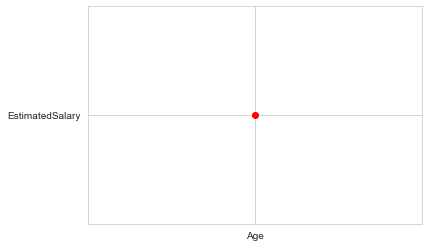

In [68]:

plt.plot(['Age'],['EstimatedSalary'],'ro')
plt.show()

SUPERVISED LEARNING

In [69]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics


#extract x and y from our data
x=data["Age"].values[:,np.newaxis]
y=data["EstimatedSalary"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 1138539804.323654
R squared 0.0036529499164262846


In [ ]:
#R-squared=0 , so our model is performing badly

Linear Regression plot

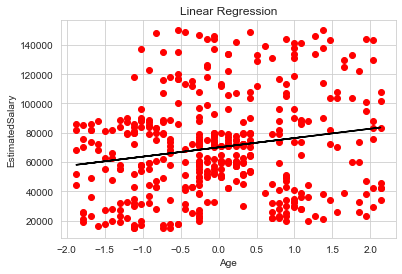

In [71]:
#let's try to estimate the salary depending on age
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("EstimatedSalary")
plt.xlabel("Age")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

cleanup={"Gender":{"Female":1, "Male": 0}}  # at first, let's convert Promoted to numerical format
data.replace(cleanup, inplace=True)

#features extraction
x = data[['Gender', 'Age','Age', 'EstimatedSalary']]
y = data['Purchased']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.68


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Purchased'>

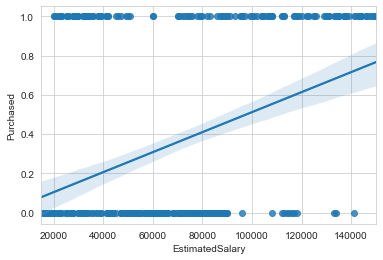

In [79]:
#Let's see the amount of purchasesdepending on salary
import seaborn as sns
sns.regplot(x='EstimatedSalary',y='Purchased',data=data)